<a href="https://colab.research.google.com/github/Misudhari/-Google-Colab/blob/main/Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [20]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split

In [17]:
data = pd.read_csv("/content/drive/MyDrive/Datasets/Salary_Data.csv")
print(data.head())

   YearsExperience   Salary
0              1.1  39343.0
1              1.3  46205.0
2              1.5  37731.0
3              2.0  43525.0
4              2.2  39891.0


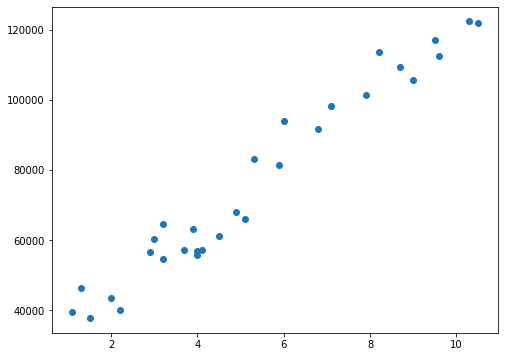

In [24]:
x = data.YearsExperience
y = data.Salary

plt.figure(figsize=(8,6))
plt.scatter(x,y)

In [ ]:
# class LinearRegression:
  # def __init__(self, lr, n_iters = 1000):


In [28]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.3, random_state = 1234)
print(x_train)
print('\n')
print(x_test)
print('\n')
print(y_test)
print('\n')
print(y_train)

13     4.1
22     7.9
24     8.7
0      1.1
2      1.5
27     9.6
26     9.5
18     5.9
5      2.9
16     5.1
25     9.0
11     4.0
9      3.7
17     5.3
29    10.5
20     6.8
12     4.0
21     7.1
6      3.0
19     6.0
15     4.9
Name: YearsExperience, dtype: float64


7      3.2
10     3.9
4      2.2
1      1.3
28    10.3
8      3.2
3      2.0
23     8.2
14     4.5
Name: YearsExperience, dtype: float64


7      54445.0
10     63218.0
4      39891.0
1      46205.0
28    122391.0
8      64445.0
3      43525.0
23    113812.0
14     61111.0
Name: Salary, dtype: float64


13     57081.0
22    101302.0
24    109431.0
0      39343.0
2      37731.0
27    112635.0
26    116969.0
18     81363.0
5      56642.0
16     66029.0
25    105582.0
11     55794.0
9      57189.0
17     83088.0
29    121872.0
20     91738.0
12     56957.0
21     98273.0
6      60150.0
19     93940.0
15     67938.0
Name: Salary, dtype: float64
